In [1]:
import os, random

from sys import path
code_dir = os.path.join(os.path.abspath("."), "Functions")
path.append (code_dir)
data_dir = './PreProcessed/'

import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import InterfacePreprocessing as IntPre
import importFunctions as iF

from PIL import Image
from scipy.ndimage import imread
from scipy.misc import imresize
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [2]:
global raw_only, image_size, num_layer
raw_only = False
raw_image_size = 180
image_size= 88
if raw_only:
    num_layer = 1
else:
    num_layer = 6

p_matching = 0.5
num_filter_1 = 16
num_filter_2 = 64
num_filter_3 = 256

images_match, images_mismatch = iF.load_pairs_from_preprocessed(os.path.join(data_dir, "Match/"), 
                                                                    os.path.join(data_dir, "MisMatch/"), 
                                                                    image_size, 
                                                                    num_layer)

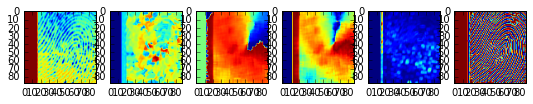

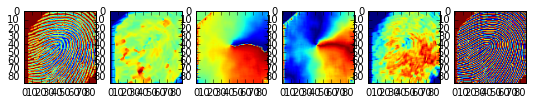

In [3]:
num=2 # This sets the number of examples to display <====
batch = iF.generate_batch_pairs_from_preprocessed(images_match, images_mismatch, num, image_size, num_layer)
batch = iF.suffle_all(batch[0], batch[1], batch[2])
for i in range(num):
    plt.figure(figsize=(9,9))
    for j in range(6):
        ax = plt.subplot(1,6,j+1)
        ax.imshow(np.reshape(batch[0][i], (88,88,6))[:,:,j])

1 0.616745213145
0 0.104487047362


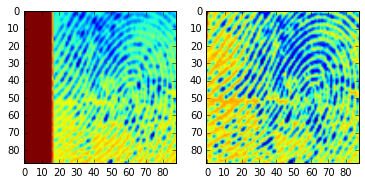

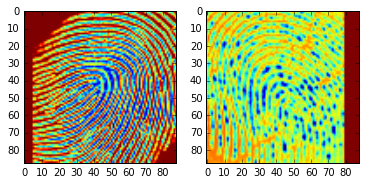

In [4]:
for i in range(num):
    plt.figure(figsize=(6,9))
    im1= np.reshape(batch[0][i], (88,88,6))[:,:,0]
    im2= np.reshape(batch[1][i], (88,88,6))[:,:,0]
    y = batch[2][i]
    n = np.prod(im1.shape)
    ax = plt.subplot(1,2,1)
    ax.imshow(im1)
    ax = plt.subplot(1,2,2)
    ax.imshow(im2)            
    print int(y[0]), np.corrcoef(np.reshape(im1, n), np.reshape(im2, n))[0, 1]

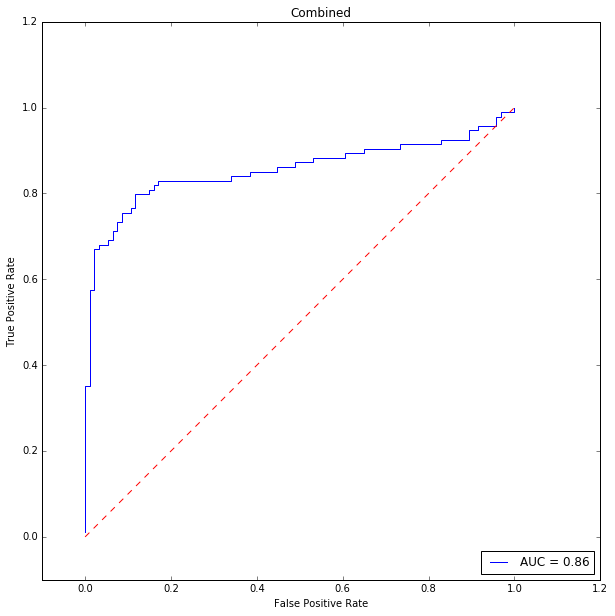

In [13]:
t = ['Original image', 'Frequency map', 'Orientation map', 'Abs orient. map', 'Variance map', 'Gabor']
im_num=188

batch = iF.generate_batch_pairs_from_preprocessed(images_match, images_mismatch, im_num, image_size, num_layer, once=True)
batch = iF.suffle_all(batch[0], batch[1], batch[2])
target = batch[2]
score = np.empty([num_layer,im_num])

for j in range (num_layer):
    for i in range(im_num):
        
        im1= np.reshape(batch[0][i], (88,88,6))[:,:,j]
        im2= np.reshape(batch[1][i], (88,88,6))[:,:,j]

        n = np.prod(im1.shape)       
        score[j][i] = np.corrcoef(np.reshape(im1, n), np.reshape(im2, n))[0, 1]

    #iF.show_ROC(target, score[j], t[j])

iF.show_ROC(target, np.sum(score, axis=0), 'Combined')

In [12]:

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
